### ***Importing Libraries***

In [97]:
# Import pandas

import pandas as pd

# Import numpy

import numpy as np 

# Import datetime

import datetime

# Import seaborn 

import seaborn as sns

# Import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

# Import pandas profiling

import pandas_profiling as pp

# Import scipy

import scipy.stats as stats

# Import math

from math import sqrt

# import ttest 

from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import norm 


## ***Loading Datasets***

In [98]:
# Load Autolib Dataset

df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

In [100]:
# Load explanation

descriptions = pd.read_excel('definitions.xlsx')

## ***Preview Datasets***

***Variable Definitions***

In [102]:
# viewing the descriptions

descriptions

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


***df - Autolib Dataset***

In [104]:
# viewing the first five entries in the dataset

df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [106]:
# Viewing of 7 samples

df.sample(7)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
6932,92260,3/16/2018,1440,4,weekday,38,34,0,0,3,3,0,0
7274,92290,4/15/2018,1439,6,weekend,20,18,1,1,1,0,0,0
9594,92600,4/9/2018,1440,0,weekday,158,176,5,4,14,10,0,0
9078,92410,2/16/2018,1439,4,weekday,3,3,0,0,1,0,0,0
5178,92140,2/3/2018,1438,5,weekend,136,126,5,4,8,8,0,0
3102,75020,6/2/2018,1440,5,weekend,600,579,21,17,46,41,190,180
16038,95880,4/23/2018,1417,0,weekday,12,16,0,0,0,0,0,0


***Learning more about the Data***

In [107]:
# checking the dataset shape

print('This dataset has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns' )

This dataset has 16085 rows and 13 columns


In [108]:
# checking the columns

df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [109]:
# Checking whether each column has an appropriate datatype

df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [110]:
# checking the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [111]:
# Descrpition of the dataset

df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


## ***Cleaning the Data***

 ***Standardizing Column names***

In [113]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(', '').str.replace(')', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


***Missing values***

In [114]:
# Missing values

# checking the number of missing values by column

df.isnull().sum()

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

***Dropping duplicate values***

In [115]:
# Dropping duplicate values

df.drop_duplicates()
df.shape

(16085, 13)

***Renaming columns***

In [116]:
df.rename(columns={'dayofweek':"day_of_week",
                   'n_daily_data_points':'daily_data_points'
                   },inplace=True)

In [117]:
# Let's check the dataset
df.head()

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


## ***Checking for outliers***

***Boxplots***

Text(0.5, 1.0, 'Boxplot showing number of bluecars taken in a certain day and area')

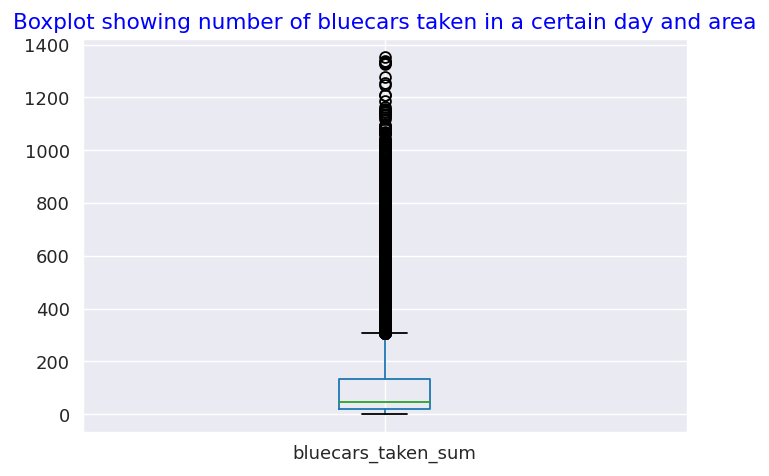

In [118]:
# Checking for Outliers

# Boxplot for bluecars taken

plt.figure(dpi = 130)
df.boxplot(['bluecars_taken_sum'])
plt.title("Boxplot showing number of bluecars taken in a certain day and area", color = 'blue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


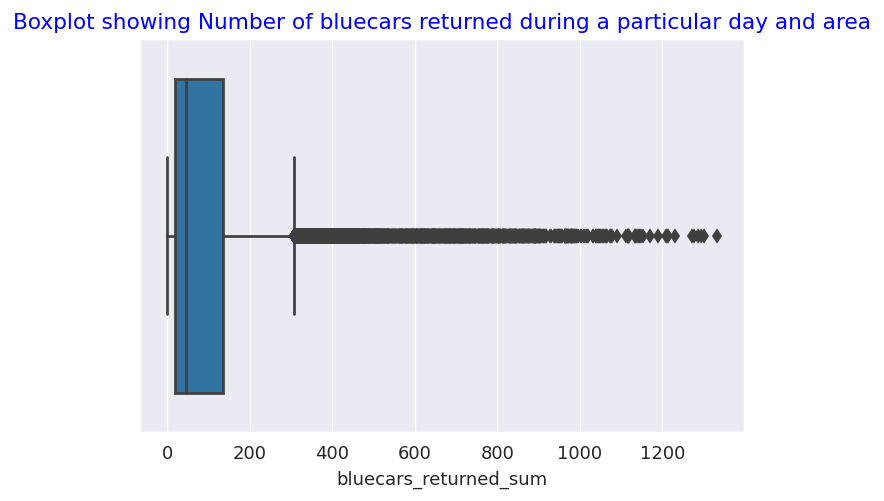

In [119]:
# Checking for Outliers

# Boxplot for bluecars taken

plt.figure(dpi = 130)
sns.boxplot(df['bluecars_returned_sum'])
plt.title("Boxplot showing Number of bluecars returned during a particular day and area", color = 'blue')
plt.show()

## ***Data Analysis***

### ***Univariate Analysis***

***Bluecars***

***Histogram***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


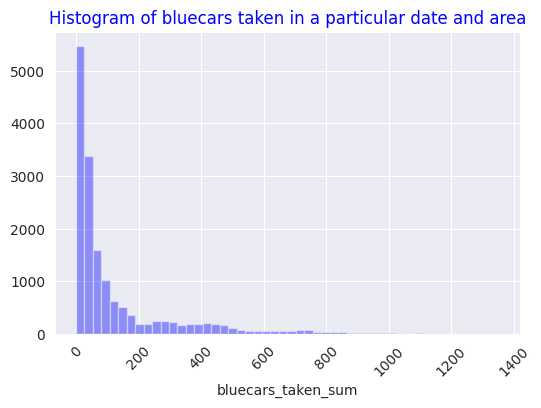

In [120]:
# Histogram of the bluecars_taken sum

plt.figure(dpi = 100)
sns.set_style("darkgrid")
sns.distplot(df["bluecars_taken_sum"], kde = False, color = "blue")
plt.title("Histogram of bluecars taken in a particular date and area", color = "blue")
plt.xticks(rotation = 45)
plt.show()


# the histogram shows us that the blue cars taken distribution is skewed to the right
# this is because the tail is more to the right hand side

# In a perfect normal distribution, the tails on either side of the curve are exact mirror images of each other.

# When a distribution is skewed to the left, the tail on the curve’s left-hand side is longer than the tail on the right-hand side,
# and the mean is less than the mode. This situation is also called negative skewness.

# When a distribution is skewed to the right, the tail on the curve’s right-hand side is longer than the tail on the left-hand side, 
# and the mean is greater than the mode. This situation is also called positive skewness.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


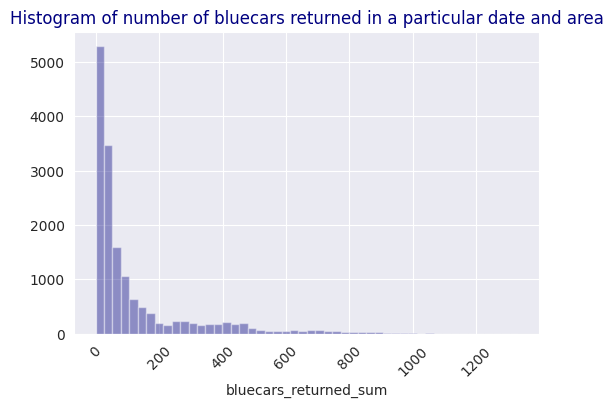

In [121]:
# Histogram of the bluecars_returned sum

plt.figure(dpi = 100)
sns.set_style("darkgrid")
sns.distplot(df["bluecars_returned_sum"], kde = False, color = 'navy')
plt.title("Histogram of number of bluecars returned in a particular date and area", color = 'navy')
plt.xticks(rotation = 45)
plt.show()


# the histogram shows us that the blue cars returned distribution is skewed to the right
# this is because the tail is long to the right side

***Density***

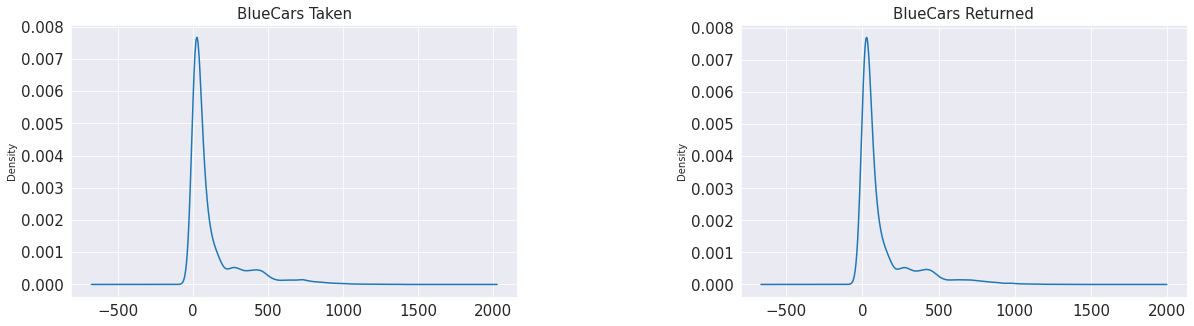

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
df['bluecars_taken_sum'].plot(kind='density', ax=ax1, fontsize=15).set_title("BlueCars Taken", fontsize=15)
df['bluecars_returned_sum'].plot( kind='density',ax=ax2, fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)

In [123]:
df[['bluecars_taken_sum','bluecars_returned_sum']].skew()

bluecars_taken_sum       2.406355
bluecars_returned_sum    2.412085
dtype: float64

In [124]:
df[['bluecars_taken_sum','bluecars_returned_sum']].kurt()

bluecars_taken_sum       6.172692
bluecars_returned_sum    6.186288
dtype: float64

In [125]:
# The BlueCars columns were both very highly skewed with the Blue_Cars returned having a skewness of 2.41 and the taken having a skew of 2.4.

# Furthermore they both had very heavy tails with a kurtosis value of 6.18 and 6.17 for the Returned and Taken columns respectively.

# This could tentatively say that the outliers in the dataset were the source of these anomalies but that it is still subject to further scrutiny.

***Utilib***

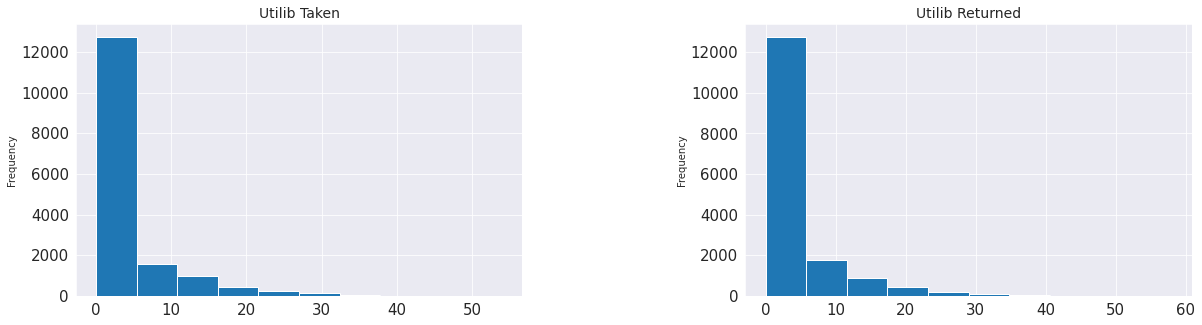

In [126]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
df['utilib_taken_sum'].plot(kind='hist', ax=axarr[0], fontsize=15).set_title("Utilib Taken", fontsize=14)
df['utilib_returned_sum'].plot( kind='hist',ax=axarr[1], fontsize=15 ).set_title("Utilib Returned", fontsize=14) 
plt.subplots_adjust(wspace=.5)

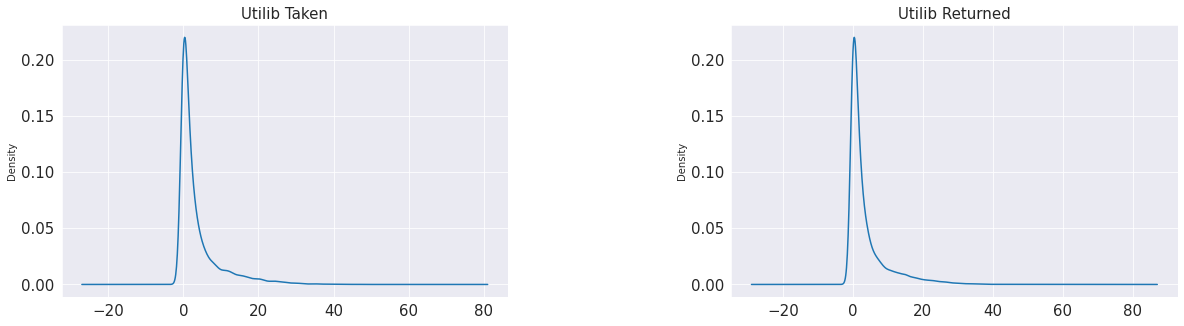

In [129]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
df['utilib_taken_sum'].plot(kind='density', ax=axarr[0], fontsize=15).set_title("Utilib Taken", fontsize=15)
df['utilib_returned_sum'].plot( kind='density',ax=axarr[1], fontsize=15 ).set_title("Utilib Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)

In [128]:
df[['utilib_taken_sum','utilib_returned_sum']].skew()

utilib_taken_sum       2.556872
utilib_returned_sum    2.578665
dtype: float64

In [130]:
df[['utilib_returned_sum','utilib_returned_sum']].kurt()

utilib_returned_sum    7.936357
utilib_returned_sum    7.936357
dtype: float64

In [131]:

# Similar to the BlueCars columns the Utilib columns were both highly skewed and very Leptokurtic.

# They had an approximate skew of 2.56 and a kurtosis value of 7.9 , meaning they also had heavy tails.

***Utilib 14***

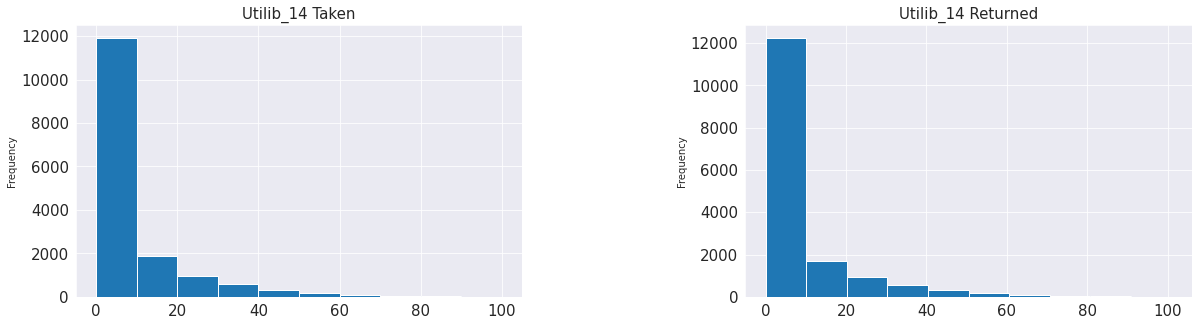

In [132]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
df['utilib_14_taken_sum'].plot(kind='hist', ax=axarr[0], fontsize=15).set_title("Utilib_14 Taken", fontsize=15)
df['utilib_14_returned_sum'].plot( kind='hist',ax=axarr[1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)

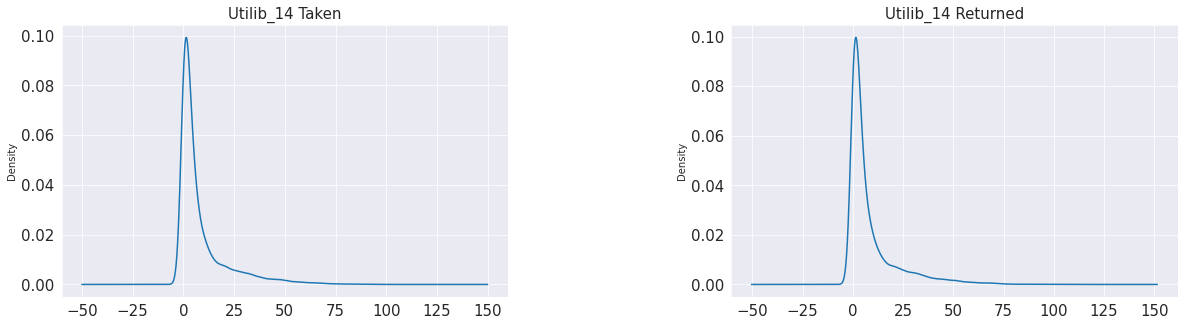

In [133]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
df['utilib_14_taken_sum'].plot(kind='density', ax=axarr[0], fontsize=15).set_title("Utilib_14 Taken", fontsize=15)
df['utilib_14_returned_sum'].plot( kind='density',ax=axarr[1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)

In [134]:
df[['utilib_14_taken_sum','utilib_14_returned_sum']].skew()

utilib_14_taken_sum       2.510924
utilib_14_returned_sum    2.511488
dtype: float64

In [135]:
df[['utilib_14_taken_sum','utilib_14_returned_sum']].kurt()

utilib_14_taken_sum       7.186815
utilib_14_returned_sum    7.185463
dtype: float64

In [136]:
# The Utilib_14 columns also had similar attributes to the BlueCars and Utilib Columns.

# They both were extremely skewed and highly Leptokurtic.

***Bar Charts***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


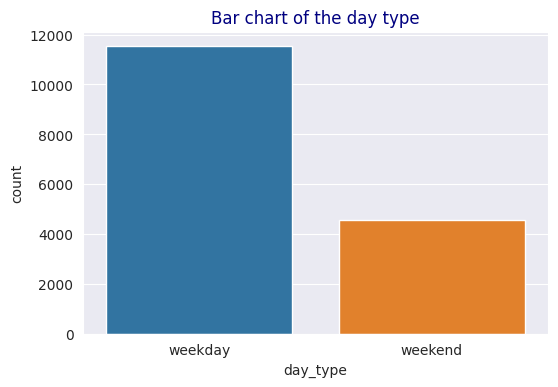

In [137]:
#  Plotting a bar plot of day_type

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df.day_type)
plt.title('Bar chart of the day type', color = 'navy')
plt.show()

# The bar chart shows that blue cars usage is more during weekdays than during the weekend.

In [138]:
# Converting the day of week from from numericals to strings for plotting
# Uning the mapping function

df['day_of_week'] = df.day_of_week.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})

***Day Of Week***

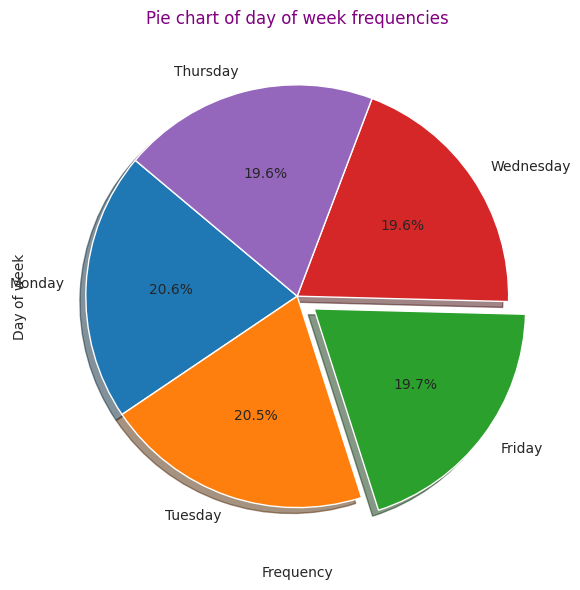

In [139]:
# # Plotting a Pie chart of the day of week categories 

# grouping the data to be plotted

day = df.day_of_week.value_counts()
day

# accessing the data to plot

# labels
sizes= day.index
sizes

# values
data = day.values
data


plt.figure(figsize = (7,7), dpi = 100)
plt.pie(data, labels = sizes, autopct = '%1.1f%%', shadow = True, explode = (0,0,0.1,0,0), startangle = 140)
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("Pie chart of day of week frequencies", color = 'purple')
plt.show()


# just like in the horizontal bar chart the activities (taking, returning, and charging) surrounding blue cars seem to be 
# equally the same throughout the week except
# on Mondays and Tuesdays where the seems to be slightly more activities compared to other days.

In [140]:
df.shape

(16085, 13)

***Day Type***

In [141]:
df.day_type.describe()

count       16085
unique          2
top       weekday
freq        11544
Name: day_type, dtype: object

In [142]:
df.day_type.value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

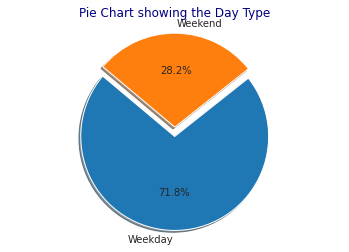

In [143]:
labels = ['Weekday','Weekend']
plt.pie(df['day_type'].value_counts() ,labels=labels,autopct = '%1.1f%%', explode=(0.1,0),shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing the Day Type', color = 'navy')
plt.show()

In [144]:

# It can be seen that there is more activity in the stations an weekdays as opposed to Weekends.

# This is probably because more days out of the week are accounted for as Weekdays.

## ***Bivariate Analysis***

In [145]:
# Analysis of two different variables to find their causes and relationships between them.

***Visualizations***

***BlueCars Taken and Returned***

***Scatter Plots***

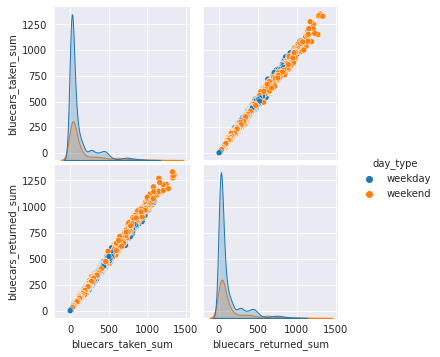

In [146]:
# Ploting the bivariate summaries and recording our observations

g = sns.pairplot(df, diag_kind="kde", hue="day_type",vars=["bluecars_taken_sum", "bluecars_returned_sum"])
plt.show()

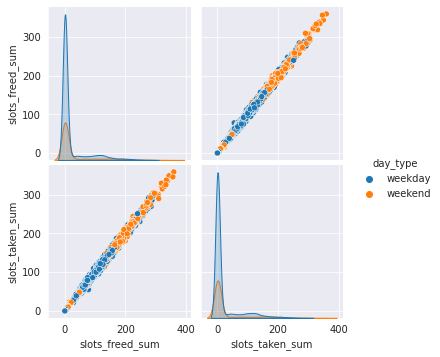

In [147]:
# Ploting the bivariate summaries and recording our observations
i = sns.pairplot(df, diag_kind="kde", hue="day_type",vars=["slots_freed_sum", "slots_taken_sum"])
plt.show()

In [148]:
# With those plot we can notice that there is more activities in weekday than weekend 

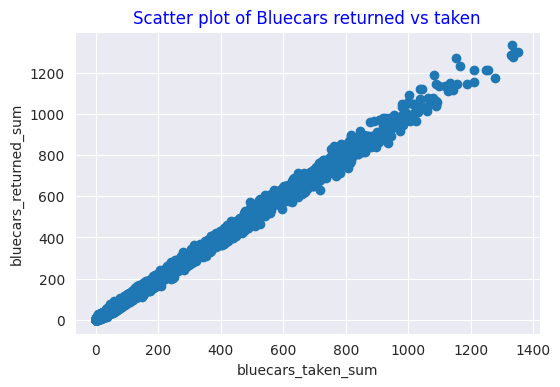

In [149]:
# Using Matplotlib: Plotting our scatterplot to compare two numerical variables
# Relationship between bluecars taken and returned 

# Specifying the chart size

plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(df['bluecars_taken_sum'], df['bluecars_returned_sum'])

# Giving the scatterplot a title
plt.title('Scatter plot of Bluecars returned vs taken', color = 'blue')

# Labelling the x axis
plt.xlabel('bluecars_taken_sum')

# Labelling the y axis
plt.ylabel('bluecars_returned_sum')

# We then display our scatterplot 
plt.show()


# There is strong positive correlation between Bluecars returned vs taken.
# As the blue cars taken increases, the bluecar returned also increases.


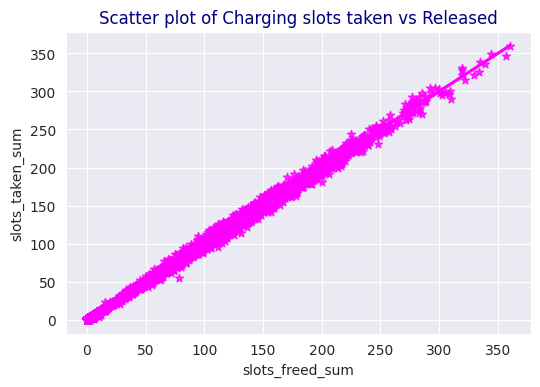

In [150]:
# Relationship between slots_freed and taken

plt.figure(dpi = 100)
sns.regplot(x = df["slots_freed_sum"], y = df["slots_taken_sum"], fit_reg=True, color = 'magenta', marker = '*')
plt.title("Scatter plot of Charging slots taken vs Released", color = 'navy')
plt.show()


# There is strong positive correlation between charging slots taken vs released.
# As the charging slots are released increases, the taken charging also increases.


In [151]:

# It can be observed that:

# There is an almost equal amount of Blue Cars being picked and returned to various stations throughout the week with Saturday having the least number of cars being picked and Saturday and Sunday having the least number of cars being returned.
# Similarly Saturday and Sunday have the least number of Utilibs being picked and returned to the stations with Monday having the most pick ups and returns.
# As obsreved in the Utilibs the Utilibs_14 have the lowest number of returns and pick-ups throughout the week.
# Interestingly Tuesday has the highest amount of both Free and Occupied charging slots within the stations all through the week.

***Type of Day***

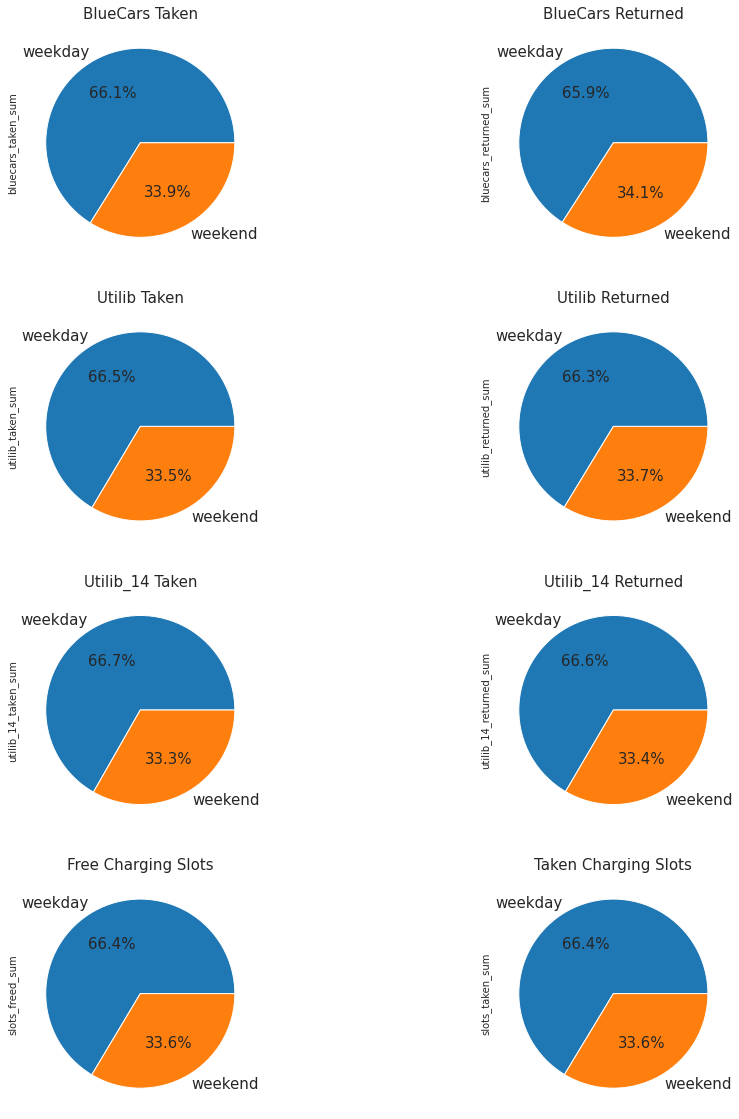

In [152]:
fig, axarr = plt.subplots(4, 2, figsize=(15, 20))
df.groupby(['day_type'])['bluecars_taken_sum'].sum().plot(kind='pie',autopct='%1.1f%%', ax=axarr[0][0],fontsize=15).set_title("BlueCars Taken", fontsize=15)
df.groupby(['day_type'])['bluecars_returned_sum'].sum().plot( kind='pie',autopct='%1.1f%%',ax=axarr[0][1], fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
df.groupby(['day_type'])['utilib_taken_sum'].sum().plot.pie(autopct='%1.1f%%',ax=axarr[1][0], fontsize=15 ).set_title("Utilib Taken", fontsize=15) 
df.groupby(['day_type'])['utilib_returned_sum'].sum().plot( kind='pie',autopct='%1.1f%%',ax=axarr[1][1], fontsize=15 ).set_title("Utilib Returned", fontsize=15) 
df.groupby(['day_type'])['utilib_14_taken_sum'].sum().plot( kind='pie',autopct='%1.1f%%',ax=axarr[2][0], fontsize=15 ).set_title("Utilib_14 Taken", fontsize=15) 
df.groupby(['day_type'])['utilib_14_returned_sum'].sum().plot( kind='pie',autopct='%1.1f%%',ax=axarr[2][1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
df.groupby(['day_type'])['slots_freed_sum'].sum().plot( kind='pie',autopct='%1.1f%%',ax=axarr[3][0], fontsize=15 ).set_title("Free Charging Slots", fontsize=15) 
df.groupby(['day_type'])['slots_taken_sum'].sum().plot( kind='pie',autopct='%1.1f%%',ax=axarr[3][1], fontsize=15 ).set_title("Taken Charging Slots", fontsize=15) 


plt.subplots_adjust(wspace=.3) 

In [153]:

# As expected, all across the board there is a high amount of Cars being picked and returned to the Stations.

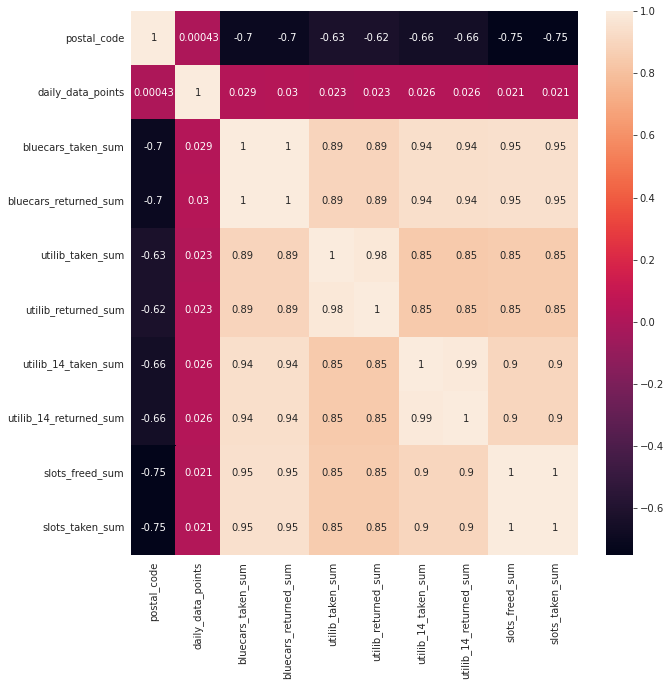

In [154]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [155]:
# Correlation Matrix 

# There is a strong positive correlation between:

# The BlueCars taken and BlueCar returned Variable
# The Free Charging Slots and the Taken Charging Slots columns.
# The Utilib taken and Utilib returned variable
# The Utilib_14 taken and the Utilib_14 returned

## ***Sampling Techniques***

In [156]:
# Calculating the sample mean of final data

sample_mean = df.mean()
print(sample_mean)


# Finding the sample size

sample_size = len(df)
print(sample_size)

# Finding the standard error of the mean of data 

std_error = df.std() / np.sqrt(sample_size)
print('the standart error is ', std_error)

# Calculating the 95% Confidence Interval for mean data 
# To calculate the confidence interval, we will use the norm object from the statssubpackage. 
# The norm object has an interval() method that receives three inputs 
# – our chosen confidence interval 0.95, and the sample mean and standard error of the mean.  

#stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

postal_code               88791.293876
daily_data_points          1431.330619
bluecars_taken_sum          125.926951
bluecars_returned_sum       125.912714
utilib_taken_sum              3.698290
utilib_returned_sum           3.699099
utilib_14_taken_sum           8.600560
utilib_14_returned_sum        8.599192
slots_freed_sum              22.629033
slots_taken_sum              22.629282
dtype: float64
16085
the standart error is  postal_code               60.297594
daily_data_points          0.261870
bluecars_taken_sum         1.462047
bluecars_returned_sum      1.462638
utilib_taken_sum           0.045850
utilib_returned_sum        0.045926
utilib_14_taken_sum        0.101478
utilib_14_returned_sum     0.101469
slots_freed_sum            0.410957
slots_taken_sum            0.411160
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


***Stratified sample***

In [157]:
# using lambda parameter y

days= df.groupby(['day_type','postal_code']).apply(lambda y: y.sample(frac=0.1))


# proportion of the non_stratified sample
print(days['day_type'].value_counts())
print(days['postal_code'].value_counts())

weekday    1135
weekend     414
Name: day_type, dtype: int64
75001    15
93100    15
93360    15
93350    15
93310    15
         ..
75006    15
92340    14
93370    14
93200    13
93390     8
Name: postal_code, Length: 104, dtype: int64


In [158]:
days.head()

postal_code       date  daily_data_points  \
day_type postal_code                                                  
weekday  75001       116        75001  4/30/2018               1440   
                     97         75001  4/11/2018               1439   
                     148        75001  6/12/2018               1439   
                     117        75001   5/1/2018               1440   
                     140        75001   6/4/2018               1440   

                         day_of_week day_type  bluecars_taken_sum  \
day_type postal_code                                                
weekday  75001       116      Monday  weekday                 118   
                     97    Wednesday  weekday                 125   
                     148     Tuesday  weekday                 126   
                     117     Tuesday  weekday                 151   
                     140      Monday  weekday                  99   

                          bluecars_returned_sum  utilib_taken_sum  \
day_type postal_code                                                
weekday  75001       116                    118                 4   
                     97                     125                 5   
                     148                    126                 4   
                     117                    151                 2   
                     140                     95                 1   

                          utilib_returned_sum  utilib_14_taken_sum  \
day_type postal_code                                                 
weekday  75001       116                    4                    4   
                     97                     5                    6   
                     148                    4                   21   
                     117                    2                   15   
                     140                    1                   16   

                          utilib_14_returned_sum  slots_freed_sum  \
day_type postal_code                                                
weekday  75001       116                       4               21   
                     97                        6               20   
                     148                      22               16   
                     117                      17               27   
                     140                      16               11   

                          slots_taken_sum  
day_type postal_code                       
weekday  75001       116               21  
                     97                21  
                     148               16  
                     117               26  
                     140               11

***Random sampling***

In [159]:
cols = ['postal_code', 'date','day_type', 'bluecars_taken_sum']
bluecarstaken= days[cols]
bluecarstaken

postal_code       date day_type  \
day_type postal_code                                          
weekday  75001       116          75001  4/30/2018  weekday   
                     97           75001  4/11/2018  weekday   
                     148          75001  6/12/2018  weekday   
                     117          75001   5/1/2018  weekday   
                     140          75001   6/4/2018  weekday   
...                                 ...        ...      ...   
weekend  95870       15820        95870  2/17/2018  weekend   
         95880       16016        95880   4/1/2018  weekend   
                     15994        95880  3/10/2018  weekend   
                     16067        95880   6/2/2018  weekend   
                     16060        95880  5/26/2018  weekend   

                            bluecars_taken_sum  
day_type postal_code                            
weekday  75001       116                   118  
                     97                    125  
                     148                   126  
                     117                   151  
                     140                    99  
...                                        ...  
weekend  95870       15820                  16  
         95880       16016                  49  
                     15994                  23  
                     16067                  29  
                     16060                  19  

[1549 rows x 4 columns]

In [161]:
# Calculating the sample mean of final data

sample_mean = bluecarstaken['bluecars_taken_sum'].mean()
sample_mean

# Finding the sample size

sample_size = bluecarstaken['bluecars_taken_sum'].shape[0]
sample_size

# Finding the standard error of the mean of data 

std_error = bluecarstaken['bluecars_taken_sum'].std() / np.sqrt(sample_size)
std_error

# Ineterval of Confidence
# Calculating the 95% Confidence Interval for mean data 

stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

(116.78052278942752, 135.4467205934001)

In [162]:
#bluecarstaken.loc[bluecarstaken['bluecars_taken_sum'] == sample]

bluecars_sample= bluecarstaken.loc[(bluecarstaken['bluecars_taken_sum']> 116.78052278942752) &(bluecarstaken['bluecars_taken_sum']< 135.4467205934001)]
bluecars_sample

postal_code       date day_type  \
day_type postal_code                                          
weekday  75001       116          75001  4/30/2018  weekday   
                     97           75001  4/11/2018  weekday   
                     148          75001  6/12/2018  weekday   
                     45           75001  2/15/2018  weekday   
                     91           75001   4/5/2018  weekday   
                     56           75001   3/1/2018  weekday   
         75002       266          75002  4/24/2018  weekday   
                     261          75002  4/19/2018  weekday   
                     205          75002  2/19/2018  weekday   
         75004       517          75004  2/19/2018  weekday   
         92150       5350         92150  2/19/2018  weekday   
                     5329         92150  1/29/2018  weekday   
         92300       7399         92300  3/15/2018  weekday   
         92400       9024         92400  6/12/2018  weekday   
                     8887         92400  1/12/2018  weekday   
                     8988         92400  4/26/2018  weekday   
                     9018         92400   6/6/2018  weekday   
         92500       9448         92500  4/19/2018  weekday   
                     9440         92500  4/11/2018  weekday   
                     9490         92500  6/11/2018  weekday   
         92600       9529         92600  1/31/2018  weekday   
         92700       9792         92700   6/1/2018  weekday   
         93100       10069        93100  4/16/2018  weekday   
         93400       12066        93400  1/31/2018  weekday   
                     12162        93400  5/21/2018  weekday   
                     12126        93400   4/4/2018  weekday   
                     12046        93400  1/11/2018  weekday   
weekend  92150       5342         92150  2/11/2018  weekend   
         92240       6702         92240  6/17/2018  weekend   
         92400       8942         92400  3/11/2018  weekend   
                     9022         92400  6/10/2018  weekend   
         92500       9451         92500  4/22/2018  weekend   
         92700       9720         92700  3/10/2018  weekend   
                     9748         92700   4/7/2018  weekend   
                     9734         92700  3/24/2018  weekend   
         93400       12063        93400  1/28/2018  weekend   
                     12167        93400  5/26/2018  weekend   
         94300       14539        94300  1/14/2018  weekend   
         94800       15494        94800   2/3/2018  weekend   

                            bluecars_taken_sum  
day_type postal_code                            
weekday  75001       116                   118  
                     97                    125  
                     148                   126  
                     45                    119  
                     91                    118  
                     56                    127  
         75002       266                   123  
                     261                   131  
                     205                   123  
         75004       517                   130  
         92150       5350                  130  
                     5329                  130  
         92300       7399                  128  
         92400       9024                  118  
                     8887                  118  
                     8988                  120  
                     9018                  120  
         92500       9448                  128  
                     9440                  118  
                     9490                  126  
         92600       9529                  121  
         92700       9792                  133  
         93100       10069                 118  
         93400       12066                 119  
                     12162                 129  
                     12126                 117  
                     12046                 120  
weekend  92150       53

***Checking consistency of data***

In [163]:
# Let's describe our data

bluecars_sample.describe()

,postal_code,bluecars_taken_sum
count,39.000000,39.000000
mean,88241.179487,123.794872
std,7895.752689,5.582772
min,75001.000000,117.000000
25%,83577.000000,119.000000
50%,92400.000000,123.000000
75%,92700.000000,128.500000
max,94800.000000,135.000000


In [164]:
# Point estimation 
# Different between the mean of two sample

df['bluecars_taken_sum'].mean() - bluecars_sample['bluecars_taken_sum'].mean()

2.1320787801981425

## ***Normality Test***

In [166]:
# imporing the shapiro function
from scipy.stats import shapiro 

# testing for normality
stat, p = shapiro(bluecars_sample['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.895, p=0.002
Sample does not look Gaussian


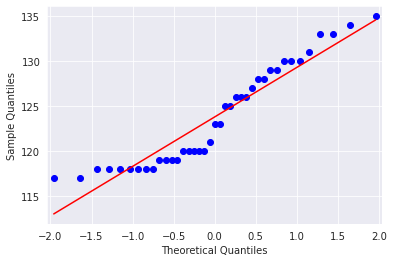

In [167]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot

qqplot(bluecars_sample['bluecars_taken_sum'], line='s')
pyplot.show()

## ***Hypothesis testing***

In [168]:
bluecars_sample.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 39 entries, ('weekday', 75001, 116) to ('weekend', 94800, 15494)
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   postal_code         39 non-null     int64 
 1   date                39 non-null     object
 2   day_type            39 non-null     object
 3   bluecars_taken_sum  39 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 46.8+ KB


In [169]:
convert_dict = {'postal_code': int}
  
bluecars_sample = bluecars_sample.astype(convert_dict) 

In [170]:
op = bluecars_sample.loc[ (bluecars_sample['day_type'] == 'weekday')& (bluecars_sample['postal_code'] < 75008) ]
op.date.sort_values(ascending=True)
op

postal_code       date day_type  bluecars_taken_sum
day_type postal_code                                                         
weekday  75001       116        75001  4/30/2018  weekday                 118
                     97         75001  4/11/2018  weekday                 125
                     148        75001  6/12/2018  weekday                 126
                     45         75001  2/15/2018  weekday                 119
                     91         75001   4/5/2018  weekday                 118
                     56         75001   3/1/2018  weekday                 127
         75002       266        75002  4/24/2018  weekday                 123
                     261        75002  4/19/2018  weekday                 131
                     205        75002  2/19/2018  weekday                 123
         75004       517        75004  2/19/2018  weekday                 130

In [171]:
op1 = bluecars_sample.loc[ (bluecars_sample['day_type'] == 'weekday')& (bluecars_sample['postal_code'] > 92000) ]
op1.date.sort_values(ascending=True)
op1

postal_code       date day_type  \
day_type postal_code                                          
weekday  92150       5350         92150  2/19/2018  weekday   
                     5329         92150  1/29/2018  weekday   
         92300       7399         92300  3/15/2018  weekday   
         92400       9024         92400  6/12/2018  weekday   
                     8887         92400  1/12/2018  weekday   
                     8988         92400  4/26/2018  weekday   
                     9018         92400   6/6/2018  weekday   
         92500       9448         92500  4/19/2018  weekday   
                     9440         92500  4/11/2018  weekday   
                     9490         92500  6/11/2018  weekday   
         92600       9529         92600  1/31/2018  weekday   
         92700       9792         92700   6/1/2018  weekday   
         93100       10069        93100  4/16/2018  weekday   
         93400       12066        93400  1/31/2018  weekday   
                     12162        93400  5/21/2018  weekday   
                     12126        93400   4/4/2018  weekday   
                     12046        93400  1/11/2018  weekday   

                            bluecars_taken_sum  
day_type postal_code                            
weekday  92150       5350                  130  
                     5329                  130  
         92300       7399                  128  
         92400       9024                  118  
                     8887                  118  
                     8988                  120  
                     9018                  120  
         92500       9448                  128  
                     9440                  118  
                     9490                  126  
         92600       9529                  121  
         92700       9792                  133  
         93100       10069                 118  
         93400       12066                 119  
                     12162                 129  
                     12126                 117  
                     12046                 120

In [172]:
print(len(op))

10


In [173]:
print(len(op1))

17


***Confirming t test assumptions***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


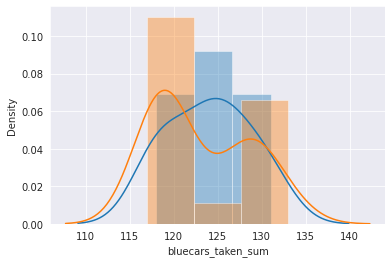

In [174]:
sns.distplot(op.bluecars_taken_sum)
sns.distplot(op1.bluecars_taken_sum)

In [175]:
from scipy.stats import skew 
import numpy as np  
import pylab as p  
  
print( '\nSkewness for data (op): ', skew(op.bluecars_taken_sum)) 
print( '\nSkewness for data (op1) : ', skew(op1.bluecars_taken_sum)) 


Skewness for data (op):  0.040860597725044974

Skewness for data (op1) :  0.45375694640843667


In [177]:
convert_dict = {'postal_code': str}
  
op= op.astype(convert_dict) 
op1= op1.astype(convert_dict) 

In [178]:
op.describe()

,bluecars_taken_sum
count,10.000000
mean,124.000000
std,4.690416
min,118.000000
25%,120.000000
50%,124.000000
75%,126.750000
max,131.000000


In [179]:
op1.describe()

,bluecars_taken_sum
count,17.000000
mean,123.117647
std,5.453008
min,117.000000
25%,118.000000
50%,120.000000
75%,128.000000
max,133.000000


In [180]:
# Hypothesis testing

# µ1 = Mean of Central Paris

# µ2 = Mean of outer parts of Paris

# Null H0 : µ1 =< µ2

# Alternative Ha: µ1 > µ2 (claim)

# The alpha level for this experiment will be 0.05

In [181]:
#Independent two sample t-test 

stat,p_value=stats.ttest_ind(a=op.bluecars_taken_sum,b=op1.bluecars_taken_sum,equal_var=False)

In [182]:
print(stat)
print(p_value)

0.4440085676719801
0.6614950223886926


In [183]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


In [184]:
#Compute the descriptive statistics of op and op1.

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
abar = op.bluecars_taken_sum.mean()
avar = op.bluecars_taken_sum.var(ddof=1)
na = op.size
adof = na - 1

bbar =op1.bluecars_taken_sum.mean()
bvar = op1.bluecars_taken_sum.var(ddof=1)
nb = op1.size
bdof = nb - 1

# Using formulas directly.
tf =(abar - bbar) / np.sqrt(avar/na + bvar/nb)
dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
pf = 2*stdtr(dof, -np.abs(tf))

print("formula:              t = %g  p = %g" % (tf, pf))

formula:              t = 0.888017  p = 0.376851


In [185]:
#degrees of freedom =
dof = adof + bdof
dof

106

In [95]:
# T critical at 0.05 confidence interval and degree of freedom of 106 is 1.6593

# T stat > T critical

# If the t-value is greater than the critical value, you reject the null hypothesis.

## [***Github link***](https://)